<a href="https://colab.research.google.com/github/jmatrone/CEE609_Research_Project/blob/main/Torrey_Pines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir ('drive/MyDrive/fwdata')

Mounted at /content/drive


In [ ]:
os. listdir ()

['2006 Census clip.shp.xml',
 'Tierra census_clip.prj',
 '2006 Census clip.shp',
 '2006 Census clip.sbn',
 '2006 Census clip.prj',
 'Tierra census_clip.dbf',
 '2006 Census clip.shx',
 'Tierra census_clip.sbx',
 'Tierra census_clip.sbn',
 '2006 Census clip.sbx',
 'Tierra census_clip.cpg',
 '2006 Census clip.dbf',
 'census data questions.docx',
 'Census slide.tif',
 '2018 Census summary_TPA corrected.pdf',
 'Tierra census_clip.shp',
 'Tierra census_clip.shx',
 'Tierra census_clip.shp.xml',
 '=2.4.0']

In [2]:
!pip install geopandas
!pip install earthpy
!pip install rtree
!pip install pygeos
!pip install mapclassify>=2.4.0
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.6 MB/s eta 0:00:00


In [3]:
Tpines = gpd.read_file('2006 Census clip.shp')

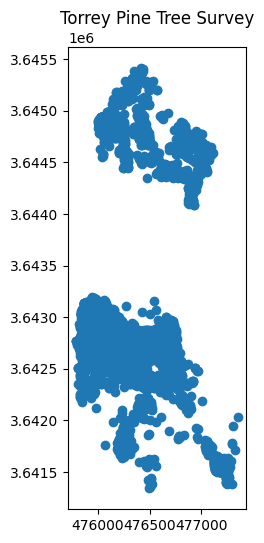

In [4]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
Tpines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Torrey Pine Tree Survey")
plt.show()

In [5]:
Tpines.head()

,Age,DBH__cm_,Height_cm_,Whorls,Trunks,Cones,Comment,SQRT_DBH,geometry
0,Sapling,0.0,110.0,7,1,No,None,0.0,POINT (476991.244 3644438.208)
1,Adult,2.1,190.0,12,1,Yes,+Cones,1.4,POINT (476992.026 3644436.86)
2,Sub-adult,1.9,225.0,14,1,No,None,1.4,POINT (476996.136 3644433.935)
3,Adult,5.4,0.0,12,1,Yes,None,2.3,POINT (476998.078 3644441.184)
4,Adult,27.3,0.0,0,1,Yes,None,5.2,POINT (477004.418 3644430.12)


In [6]:
Tpines2018 = gpd.read_file('Tierra census_clip.shp')

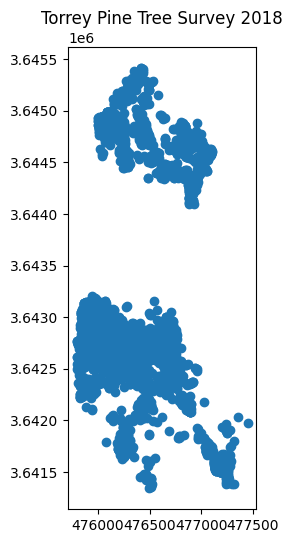

In [7]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
Tpines2018.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Torrey Pine Tree Survey 2018")
plt.show()

In [8]:
Tpines2018.head()

,OBJECTID_1,Age,DBH__cm_,Height_cm_,Whorls,Trunks,Cones,Comment,Health,GPS_Used,Azimuth,Distance,Date,DBH,rDBH,geometry
0,1,Adult,64.3,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476614.461 3644430.582 0)
1,2,Adult,61.6,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476610.757 3644438.886 0)
2,3,Adult,33.0,0.0,0,1,Yes,Prostrate only able to measure 1 upright trunk,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476598.128 3644423.615 0)
3,4,Adult,64.8,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476614.896 3644415.567 0)
4,5,Adult,56.0,0.0,0,2,Yes,23.0,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476612.47 3644423.313 0)


In [9]:
print("Tpines columns:", Tpines.columns)
print("Tpines2018 columns:", Tpines2018.columns)


Tpines columns: Index(['Age', 'DBH__cm_', 'Height_cm_', 'Whorls', 'Trunks', 'Cones', 'Comment',
       'SQRT_DBH', 'geometry'],
      dtype='object')
Tpines2018 columns: Index(['OBJECTID_1', 'Age', 'DBH__cm_', 'Height_cm_', 'Whorls', 'Trunks',
       'Cones', 'Comment', 'Health', 'GPS_Used', 'Azimuth', 'Distance', 'Date',
       'DBH', 'rDBH', 'geometry'],
      dtype='object')


In [10]:
# Calculate the total number of trees in each dataset
total_trees_2006 = len(Tpines)
total_trees_2018 = len(Tpines2018)

print(total_trees_2006)
print(total_trees_2018)
#2006-4672    2018-4398

# Calculate the difference in tree population
population_difference = total_trees_2018 - total_trees_2006

4672
4398


In [11]:
# Determine if there is an increase or decrease
if population_difference > 0:
    result = f"There is an increase of {population_difference} trees in 2018 compared to 2006."
elif population_difference < 0:
    result = f"There is a decrease of {abs(population_difference)} trees in 2018 compared to 2006."
else:
    result = "The tree population remained the same in 2018 compared to 2006."

print(result)
#There is a decrease of 274 trees in 2018 compared to 2006.

There is a decrease of 274 trees in 2018 compared to 2006.


In [16]:
!pip install rioxarray
import os
import rioxarray as rxr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.3 MB/s eta 0:00:00


In [1]:
pip install pyPRISMClimate


In [2]:
import pyPRISMClimate as prism

# Define the parameters for the data you want to download
params = {
    'type': 'ppt',  # Precipitation
    'resolution': '4km',  # Resolution
    'time_period': 'monthly',  # Time period
    'year': 2018,
    'month': 12
}

# Download the data
prism.download_data(**params)

# Read the data
data = prism.read_data(**params)

# Print the data
print(data)


AttributeError: module 'pyPRISMClimate' has no attribute 'download_data'

In [9]:
import os
import pandas as pd

# Construct the file path using os.path.join
file_path = os.path.join("C:", "Users", "Jade", "Desktop", "PRISM_research_project.csv")
print(f"File path: {file_path}")

if os.path.exists(file_path):
    try:
        with open(file_path, 'r') as file:
            print("File opened successfully")
        data = pd.read_csv(file_path, skiprows=11)
        print(data.head())
    except FileNotFoundError:
        print("File not found. Please check the file path.")
else:
    print("File not found. Please check the file path.")






File path: C:/Users/Jade/Desktop/PRISM_research_project.csv
File not found. Please check the file path.


In [11]:
import os
import pandas as pd

file_path = r"C:\Users\Jade\Downloads\PRISM_ppt_tmean_2001_2018.csv"
print(f"Checking file path: {file_path}")


if os.path.exists(file_path):
    try:
        with open(file_path, 'r') as file:
            print("File opened successfully")
        data = pd.read_csv(file_path, skiprows=10)
        print(data.head())
    except FileNotFoundError:
        print("File not found. Please check the file path.")
else:
    print("File not found. Please check the file path.")


Checking file path: C:\Users\Jade\Downloads\PRISM_ppt_tmean_2001_2018.csv
File not found. Please check the file path.
